In this post, I use a neural network to approximate a simple nonlinear function, and I will investigate how changing the number of hidden layers helps in learning the function representation.

<!-- TEASER_END -->

This is part of a series. Here is a link to [Part I](link://slug/deep-learning-building-intuition-part-i).

Last time, the model was changed to add more neurons to the single hidden layer. This time the model will have more layers added.

On to the code. Here are the required libraries.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.initializers import Constant

Using TensorFlow backend.


The fake data will be the same as last time, 1,000 random points in the interval (0,1) with a kink in the middle.

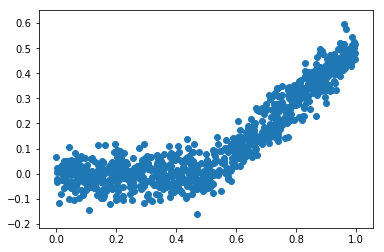

In [2]:
N = 1000       # number of data points to create
scale = 0.05   # standard deviation of the noise to add

X = np.random.uniform(size=N)
Y = np.maximum(0,X-0.5) + np.random.normal(scale=scale, size=N)
X = X.reshape((N,1))
Y = Y.reshape((N,1))
x_train, y_train = X[:(N//10)*9,:], Y[:(N//10)*9,:]
x_test, y_test = X[(N//10)*9:,:], Y[(N//10)*9:,:]

_ = plt.scatter(x_train, y_train)

Just for reference, here is the minumum MSE that can be achieved.

In [3]:
print("Minimum possible MSE: {:.4}".format(scale**2))

Minimum possible MSE: 0.0025


## Model creation with more hidden layers

The `create_model` function is very similar here, but now there is an option to add more than one hidden layer. For simplicity, the number of neurons in each layer will be the same.

MSE: 0.02618
CPU times: user 932 ms, sys: 24 ms, total: 956 ms
Wall time: 877 ms


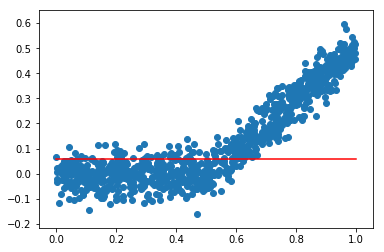

In [4]:
%%time

def create_model(num_neurons=10, num_layers=1, epochs=1):
    """Create a simple network with one hidden layer

    num_neurons: Number of neurons per layer.
    num_layers:  Number of hidden layers in the network.
    epochs:      Number of epochs for training.
    """
    
    model = Sequential()

    # The first hidden layer is a bit special, we have to specify the input_dim
    model.add(Dense(num_neurons, input_dim=1, activation="relu", kernel_initializer="normal"))

    # The subsequent layers are all the same form
    for i in range(num_layers-1):
        model.add(Dense(num_neurons, activation="relu", kernel_initializer="normal"))
    
    # Output layer
    model.add(Dense(1, activation="linear", kernel_initializer="normal"))

    model.compile(loss="mse", optimizer="sgd")

    # Fit on training data, evaluate on test data
    fit = model.fit(x_train, y_train, epochs=epochs, verbose=False)
    score = model.evaluate(x_test, y_test, verbose=False)

    # See model predictions and MSE
    x_pred = np.linspace(0,1,100)
    y_pred = model.predict(x_pred)

    print("MSE: {:.4}".format(score))

    # Plot the data and predictions
    plt.scatter(x_train, y_train)
    plt.plot(x_pred, y_pred, color="red")


# Model with single neuron in the hidden layer
create_model(num_neurons=1)

This is the first model that was run in the previous post, and it is still lousy here. Increasing the layers, neurons, and epochs will all help to fit the function better. For now, I will hold epochs constant at 100 and vary the other two. For comparison, here ithe previous model trained on more epochs.

MSE: 0.02542


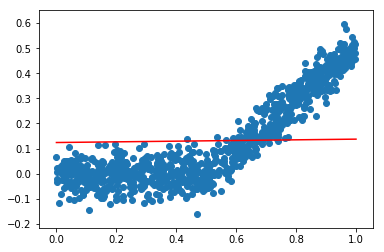

In [5]:
create_model(num_neurons=1, epochs=100)

The model MSE has come down because the network learned to raise the estimate on average, but it has not picked up on the nonlinearity.

## Increasing the neurons

Like last time, if the neurons are increased, a better fit is possible.

MSE: 0.006608
CPU times: user 8.68 s, sys: 1.25 s, total: 9.94 s
Wall time: 5.45 s


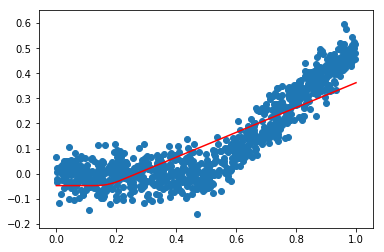

In [6]:
%%time

create_model(num_neurons=100, epochs=100)

MSE: 0.004182
CPU times: user 11.7 s, sys: 1.28 s, total: 13 s
Wall time: 7.11 s


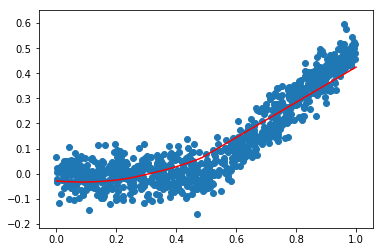

In [7]:
%%time

create_model(num_neurons=1000, epochs=100)

## Increasing the number of layers

What happens if the number of layers is increased?

MSE: 0.007147
CPU times: user 12.1 s, sys: 1.49 s, total: 13.6 s
Wall time: 6.79 s


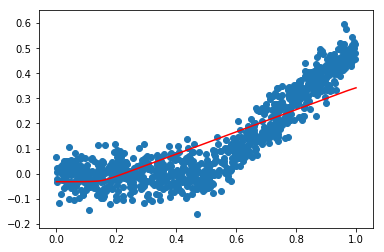

In [8]:
%%time

create_model(num_neurons=100, num_layers=2, epochs=100)

MSE: 0.02403
CPU times: user 14.7 s, sys: 1.91 s, total: 16.6 s
Wall time: 7.98 s


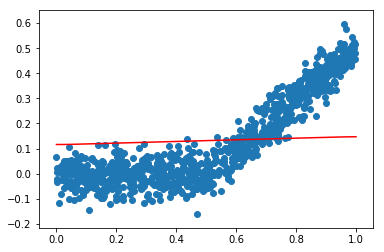

In [9]:
%%time

create_model(num_neurons=100, num_layers=3, epochs=100)

MSE: 0.02607
CPU times: user 17.3 s, sys: 2.22 s, total: 19.5 s
Wall time: 9.09 s


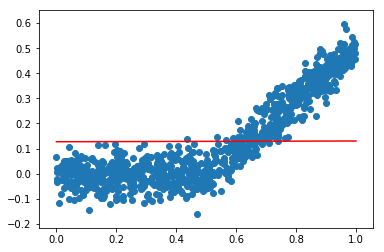

In [10]:
%%time

create_model(num_neurons=100, num_layers=4, epochs=100)

It seems that adding more layers has made the MSE worse, at least for the setup used here (100 epochs, etc).

## Conclusion

To be honest, I am a little surprised at these results. The advice I've heard is "deeper is better than wider", meaning it is better to add a layer to the network than add more neurons to an existing layer. I guess one takeaway would be that is not always the case.

I suspect the extra layers are making it harder for the network to learn. Possibly changing the learning rate could help here. Perhaps I will explore that in a future post.